# Capstone Part 2: Overview

#### I will be covering neither of my proposals covered during my lightning talks. I was originally planning on doing the animal classification lab but the dataset was limited with the amount of data in there. 

#### I am planning on using cryptocurrency price predictions to determine what will be the future prices of Bitcoin, Ethereum, and Monero based on the historical open and close prices of the cryptocurrencies from kaggle.
###### https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

## Main goals of the project:

1.The main goals of the project will be to determine what the future prices of Bitcoin will be in one year from now or two years from now using the Kaggle dataset as well as supplementing the data with current open and close prices to provide a better prediction as to what the prices will be months from now.

## Proposed Methods and Models:

#### There about 19 sets of data included for this project from Kaggle. 3 of those are data about Bitcoin. Specifically:
#### - Bitcoin Price: 
###### - Features: Date, Open, High, Low, Close, Volume, MarketCap
#### - Bitcoin Dataset:
###### - Features: total btc in circulation, btc block size, btc hash rate, btc cost per transaction, btc # of transactions, etc 
#### - Other Crypto Currency Cash Price (Monero, Ethereum, Bitcoin, etc)
###### - Features: Same features as 'Bitcoin Price' Dataset


## Models:

###### Since I'm trying to predict the price of these cryptocurrencies, I will be using a time series model. I plan on trying ARIMA and seasonal models. Outside of that I'm plan on using Pyflux and Prophet which are separate libraries desgined for time series modeling within python. Lasso and ElasticNet to see which model would be best predict the future price. I also plan on using existing open and close price data from Bitcoin, ethereum, and Monero sites from the past few months to see if my dataset can accurately predict those prices. So I would be using dataset from Kaggle as my training dataset and using supplemental data from the web as my test data. 

## Risks and Assumptions:

### For the bitcoin_cash_price dataset there are features such Volume and Market Cap that I assume would have good predictive power on the price of bitcoin values or other cryptocurrency values but they may not have any predictive power so I may have to drop them.
### There are features in the bitcoin dataset  that need an understanding of domain knowledge so I will have to some research onto these features to understand what these mean in regards bitcoin price fluctuations and the context of it.

## Initial Goals & Success Criteria:

##### My success for this model will be determined by how accurate my predicitve model and/or it can predict the opening/closing price of currency on a past date. This is TBD, and needs to be talked more with my local instructor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import datetime as datetime
import math, datetime

# import modeling libraries
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
btc_cash_price = pd.read_csv('bitcoin_cash_price.csv')
btc_price = pd.read_csv('bitcoin_price.csv')
btc_ds = pd.read_csv('bitcoin_dataset.csv')

# bitconnect_price = pd.read_csv('bitconnect_price.csv')
# dash_price = pd.read_csv('dash_price.csv')

ethereum_classic_price = pd.read_csv('ethereum_classic_price.csv')
ethereum_dataset = pd.read_csv('ethereum_dataset.csv')
ethereum_price = pd.read_csv('ethereum_price.csv')

# iota_price = pd.read_csv('iota_price.csv')
litecoin_price = pd.read_csv('litecoin_price.csv')
monero_price = pd.read_csv('monero_price.csv')
# nem_price = pd.read_csv('nem_price.csv')

# neo_price = pd.read_csv('neo_price.csv')
# numeraire_price = pd.read_csv('numeraire_price.csv')
# omisego_price = pd.read_csv('omisego_price.csv')
# qtum_price = pd.read_csv('nem_price.csv')
# ripple_price = pd.read_csv('ripple_price.csv')
# stratis_price = pd.read_csv('stratis_price.csv')
# waves_price = pd.read_csv('waves_price.csv')

## Viewing the # of rows and columns for tables across cryptocurrencies

In [3]:
print('btc_cash_price:', btc_cash_price.shape)
print('btc_price:', btc_price.shape)
print('btc_ds:', btc_ds.shape)
print('\n')
print('ethereum_classic_price:', ethereum_classic_price.shape)
print('ethereum_dataset:', ethereum_dataset.shape)
print('ethereum_price:', ethereum_price.shape)
print('\n')
print('litecoin_price:', litecoin_price.shape)
print('monero_price:', monero_price.shape)

btc_cash_price: (108, 7)
btc_price: (1655, 7)
btc_ds: (2920, 24)


ethereum_classic_price: (472, 7)
ethereum_dataset: (832, 18)
ethereum_price: (824, 7)


litecoin_price: (1655, 7)
monero_price: (1266, 7)


## Taking a look at Ethereum Price

In [4]:
ethereum_price.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [5]:
ethereum_price.head()
ethereum_price['Date'] = pd.to_datetime(ethereum_price['Date'])
ethereum_price = ethereum_price.sort_values('Date')
ethereum_price.set_index('Date', inplace=True)

In [6]:
ethereum_price.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2015-08-07,2.830000,3.540000,2.520000,2.770000,"164,329",-
2015-08-08,2.790000,2.800000,0.714725,0.753325,"674,188","167,911,000"
2015-08-09,0.706136,0.879810,0.629191,0.701897,"532,170","42,637,600"
2015-08-10,0.713989,0.729854,0.636546,0.708448,"405,283","43,130,000"
2015-08-11,0.708087,1.130000,0.663235,1.070000,"1,463,100","42,796,500"


In [7]:
ethereum_price.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-11-03,288.50,308.31,287.69,305.71,"646,340,000","27,547,400,000"
2017-11-04,305.48,305.48,295.80,300.47,"416,479,000","29,175,300,000"
2017-11-05,300.04,301.37,295.12,296.26,"337,658,000","28,661,500,000"
2017-11-06,296.43,305.42,293.72,298.89,"579,359,000","28,322,700,000"
2017-11-07,298.57,304.84,290.77,294.66,"540,766,000","28,533,300,000"


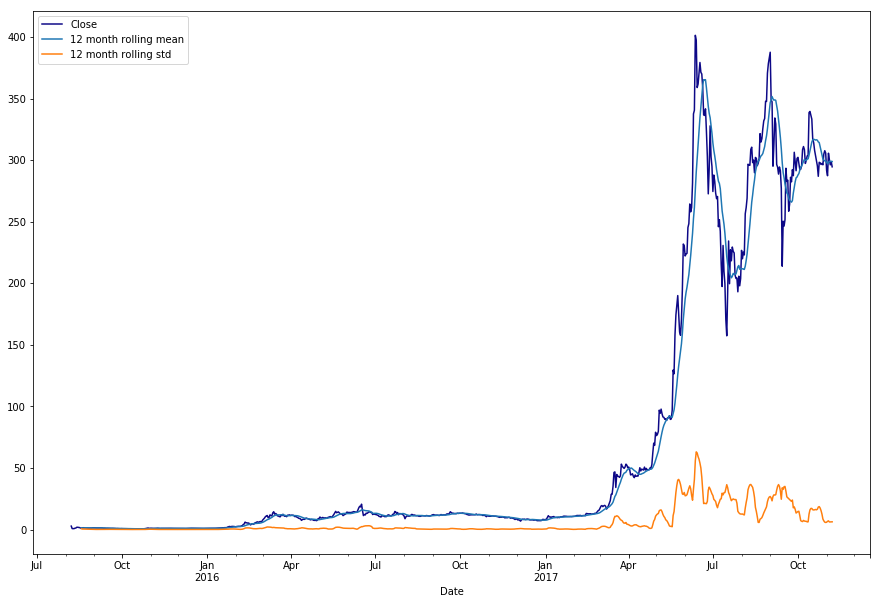

In [8]:
ethereum_price['Close']['2015-08-07':].plot(figsize=(15,10), 
                                            colormap='plasma')
ethereum_price['Close'].rolling(12).mean().plot(label='12 month rolling mean')
ethereum_price['Close'].rolling(12).std().plot(label='12 month rolling std')
plt.legend()

# standard deviation is pretty bad towards the end

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

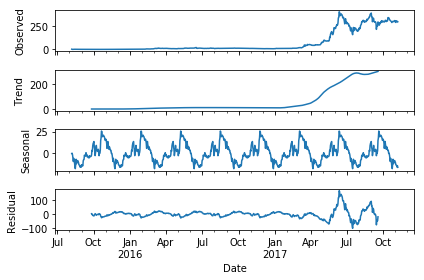

In [10]:
result_close_eth = seasonal_decompose(ethereum_price['Close'], freq=100)
result_close_eth.plot();

In [11]:
ethereum_price.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2015-08-07,2.830000,3.540000,2.520000,2.770000,"164,329",-
2015-08-08,2.790000,2.800000,0.714725,0.753325,"674,188","167,911,000"
2015-08-09,0.706136,0.879810,0.629191,0.701897,"532,170","42,637,600"
2015-08-10,0.713989,0.729854,0.636546,0.708448,"405,283","43,130,000"
2015-08-11,0.708087,1.130000,0.663235,1.070000,"1,463,100","42,796,500"


In [12]:
# importing necessary test
from statsmodels.tsa.stattools import adfuller

# Creating function to pring out results of Dicky-Fuller test
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Stat', 'p-value', '# of lags', 'num of observations used']
    
    for value, label in zip(result,labels):
        print(label + ' : ' +str(value))
    
    if result[1] <= 0.05:
        print('strong evidence against null hypothesis')
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('weak eveidence against null hypothesis')
        print('fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')

Augmented Dicky-Fuller Test
ADF Test Stat : -1.18390279395
p-value : 0.68048171084
# of lags : 20
num of observations used : 803
weak eveidence against null hypothesis
fail to reject null hypothesis
Data has a unit root, it is non-stationary


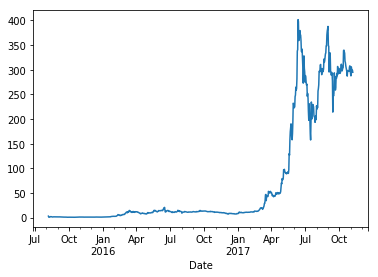

In [14]:
adf_check(ethereum_price['Close'])
ethereum_price['Close'].plot()
# data is non-stationary so need to difference it 

Augmented Dicky-Fuller Test
ADF Test Stat : -4.44411964343
p-value : 0.000247780078754
# of lags : 19
num of observations used : 803
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


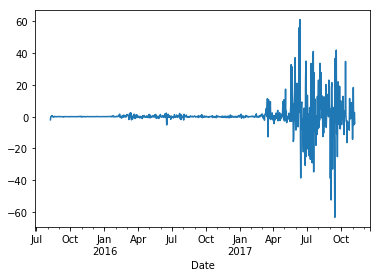

In [15]:
ethereum_price['First Diff'] = ethereum_price['Close'] - ethereum_price['Close'].shift(1)
# create a difference of one period

# Checking if time series is stationary through Dickey-Fuller Test and dropping null values
adf_check(ethereum_price['First Diff'].dropna())

# data is stationary now, checking to see plot
ethereum_price['First Diff'].plot()

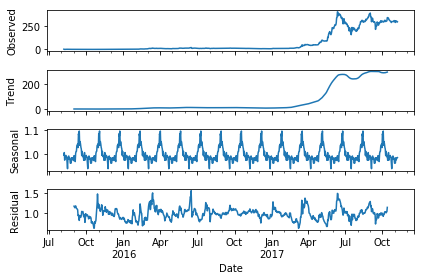

In [16]:
result_close = seasonal_decompose(ethereum_price['Close'], model='multiplicative', freq=50)
result_close.plot();

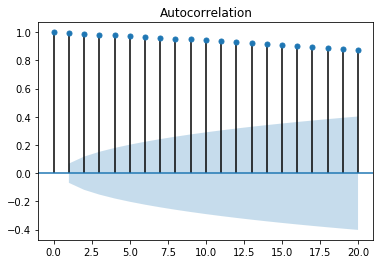

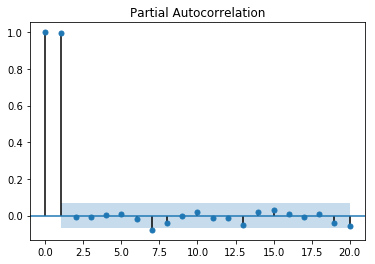

In [17]:
from statsmodels.tsa.arima_model import ARMA
# importing the libraries needed
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ethereum_price['Close'].dropna(), lags=20);
plot_pacf(ethereum_price['Close'].dropna(), lags=20);

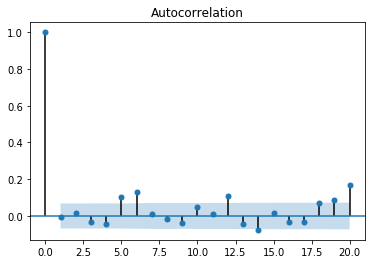

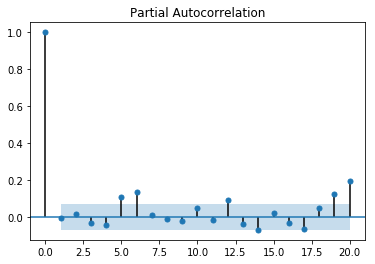

In [18]:
plot_acf(ethereum_price['First Diff'].dropna(), lags=20);
plot_pacf(ethereum_price['First Diff'].dropna(), lags=20);

In [ ]:
arima_eth.forecast()

In [31]:
arima_eth.fittedvalues[:-1].tail()

Date
2017-11-02    15.131291
2017-11-03     5.131282
2017-11-04   -16.983401
2017-11-05     6.628533
2017-11-06     4.495912
dtype: float64

In [19]:
arima_eth = ARIMA(ethereum_price['First Diff'].dropna(), order=(3,1,1), dates=ethereum_price.index).fit()

In [20]:
ethereum_price['Close'].dropna().shape

(824,)

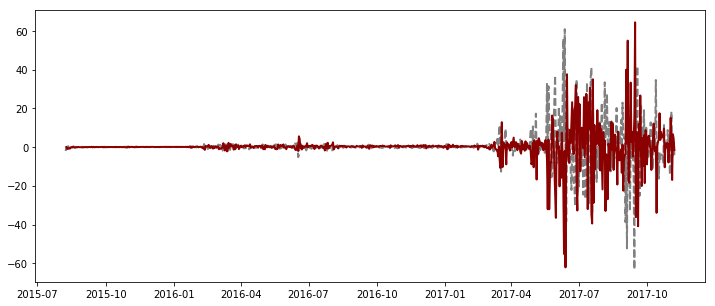

In [21]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(ethereum_price.index[1:], ethereum_price['First Diff'].dropna(), lw=2, color='grey', ls='dashed')
ax.plot(ethereum_price.index[2:], arima_eth.fittedvalues, lw=2, color='darkred')
plt.show()

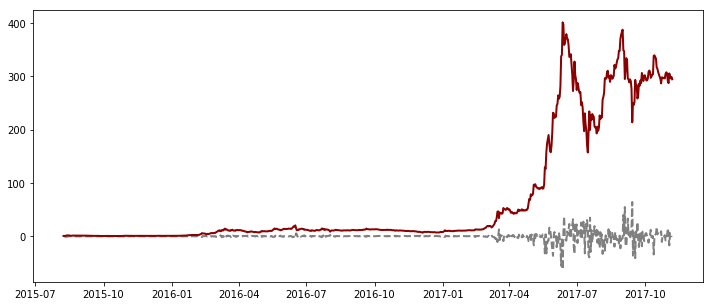

In [116]:
ethereum_price['forecast'] = arima_eth.predict(start=1, end=822)
# ethereum_price[['Close','forecast']].plot(figsize=(12,8))


# full_pred = ethereum_price['First Diff'].values[1]+np.cumsum(arima_eth.fittedvalues)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(ethereum_price.index[2:], ethereum_price['forecast'][2:], lw=2, color='grey', ls='dashed')
ax.plot(ethereum_price.index[1:], ethereum_price['Close'].dropna()[1:], lw=2, color='darkred')
plt.show()

In [119]:
from sklearn.metrics import r2_score
r2_score(ethereum_price['First Diff'].dropna()[1:], arima_eth.predict(start=1, end=822))

-0.99611507211832095

In [120]:
print(btc_price.shape)# we want to look at doing a timeseries on the close price
btc_price.head()

(1655, 7)


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


## Setting datetime and indexing the date

In [121]:
btc_price['Date'] = pd.to_datetime(btc_price['Date'])
# converting the date column to datetime series

btc_price = btc_price.sort_values('Date')
# reversing the order of dates from oldest to most recent

btc_price.set_index('Date',inplace = True)

In [122]:
btc_price.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [123]:
btc_price.isnull().sum() # no null or missing values

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [124]:
btc_price['Volume'] = btc_price['Volume'].apply(lambda x: x.replace(',',''))

In [125]:
corr = btc_price[['Open', 'High', 'Low', 'Close']]

In [126]:
btc_price_corr = corr.corr()

In [127]:
btc_price_corr

,Open,High,Low,Close
Open,1.000000,0.999275,0.999117,0.998519
High,0.999275,1.000000,0.998927,0.999371
Low,0.999117,0.998927,1.000000,0.999288
Close,0.998519,0.999371,0.999288,1.000000


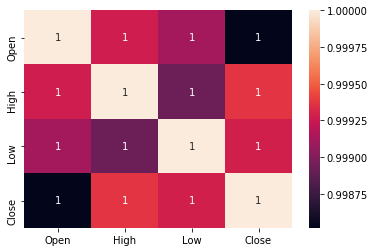

In [128]:
sns.heatmap(btc_price.corr(), annot=True)

In [129]:
btc_price.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


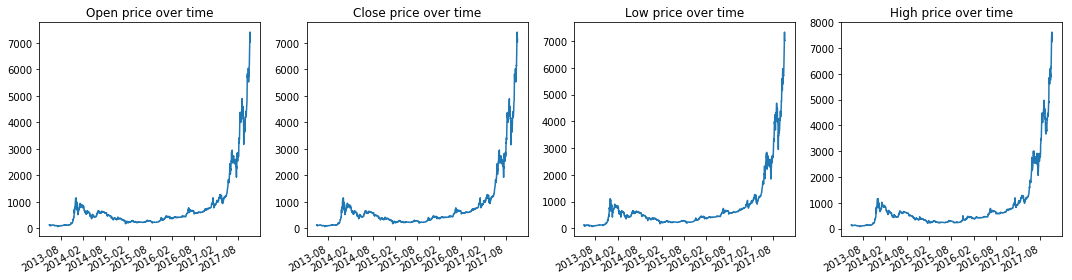

In [130]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
from statsmodels.tsa.seasonal import seasonal_decompose


ax[0].plot(btc_price.index, btc_price['Open'])
ax[0].set_title('Open price over time')

ax[1].plot(btc_price.index, btc_price['Close'])
ax[1].set_title('Close price over time')

ax[2].plot(btc_price.index, btc_price['Low'])
ax[2].set_title('Low price over time')

ax[3].plot(btc_price.index, btc_price['High'])
ax[3].set_title('High price over time')
fig.autofmt_xdate()
plt.tight_layout()

In [131]:
btc_price_close = btc_price[['Close']]
btc_price_open = btc_price[['Open']]
btc_price_low = btc_price[['Low']]
btc_price_high = btc_price[['High']]

In [132]:
btc_price_close.shape

(1655, 1)

In [133]:
# from scipy import stats
# btc_price_close = btc_price_close[(np.abs(stats.zscore(btc_price_close)) < 3).all(axis=1)]
'''Tried removing the outliers to see if the smaller dataset would have better predictions 
but made no effect when testing models with removed outliers'''

'Tried removing the outliers to see if the smaller dataset would have better predictions \nbut made no effect when testing models with removed outliers'

In [134]:
btc_price_close.shape

(1655, 1)

## Bitcoin 'Close' price trend

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0,0.5,'Price')

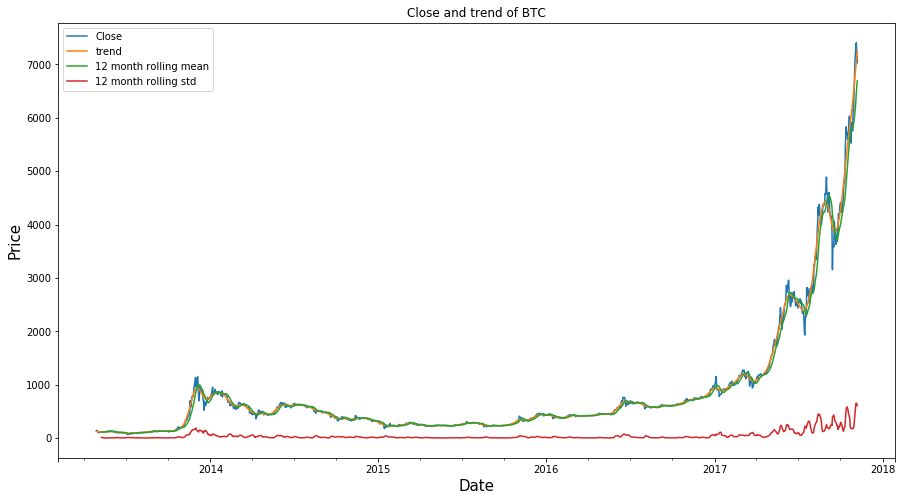

In [135]:
# Creating tuple for cycle and trend values
close_cycle, close_trend = sm.tsa.filters.hpfilter(btc_price_close['Close'])

#creating a column for trend
btc_price_close['trend'] = close_trend

# plotting close and trend values on plot from earliest start date
btc_price_close[['Close', 'trend']]['2013-04-28':].plot(title='Close and trend of BTC', figsize=(15,8));

# btc_price_close['Close']['2015-08-07':].plot(figsize=(15,10), 
#                                             colormap='plasma')
btc_price_close['Close'].rolling(12).mean().plot(label='12 month rolling mean')
btc_price_close['Close'].rolling(12).std().plot(label='12 month rolling std')
plt.legend()

plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)

In [136]:
btc_price_close.shape

(1655, 2)

## Bitcoin 'Open' Price and Trend

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


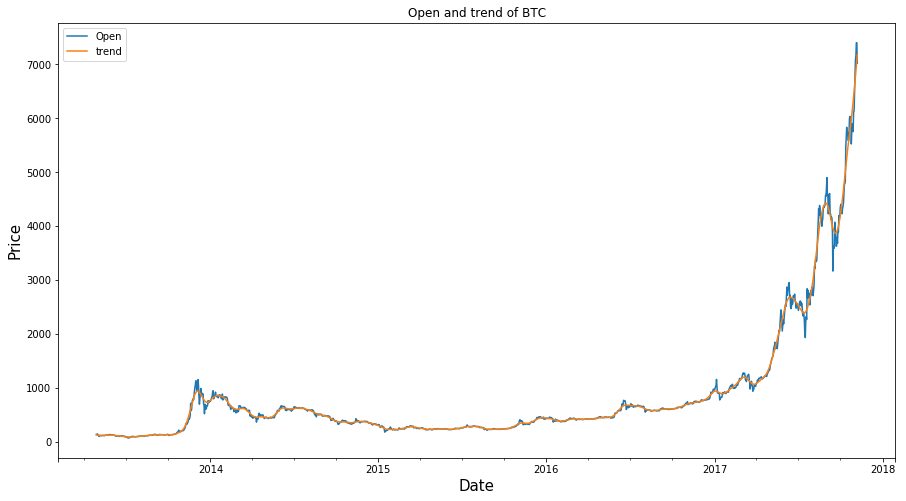

In [137]:
# Creating tuple for cycle and trend values
open_cycle, open_trend = sm.tsa.filters.hpfilter(btc_price_open['Open'])

#creating a column for trend
btc_price_open['trend'] = open_trend

# plotting close and trend values on plot from earliest start date
btc_price_open[['Open', 'trend']]['2013-04-28':].plot(title='Open and trend of BTC', figsize=(15,8));
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend()

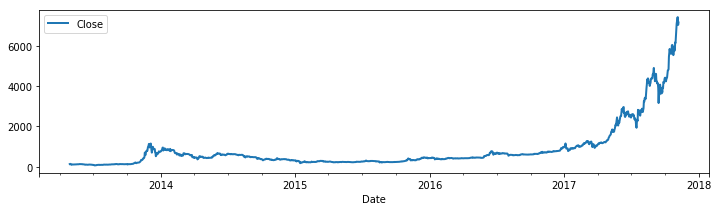

In [138]:
btc_price.plot.line(x=btc_price.index, y='Close', figsize=(12,3), lw=2)

Text(0,0.5,'Price in USD $')

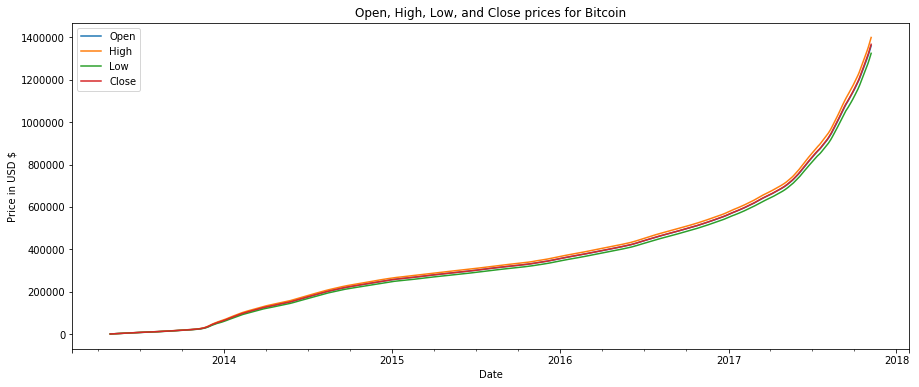

In [139]:
df_test = btc_price.cumsum()
plt.figure(figsize=(12,6)); 

ax = df_test.plot(kind='line', 
                           title='Open, High, Low, and Close prices for Bitcoin', figsize=(15,6));
ax.set_ylabel('Price in USD $',fontsize=10)

## viewing seasonal decomposition for Closing Price

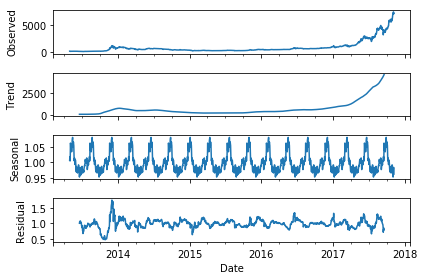

In [140]:
result_close = seasonal_decompose(btc_price_close['Close'], model='multiplicative', freq=100)
result_close.plot();

## viewing seasonal decomposition for Opening Price

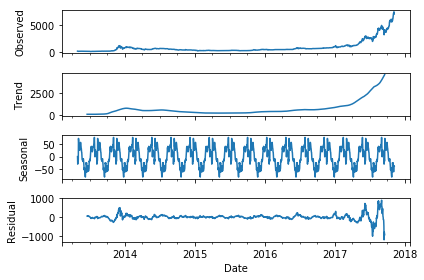

In [141]:
result_open = seasonal_decompose(btc_price_open['Open'], freq=100)
result_open.plot();

## viewing seasonal decomposition for High Price

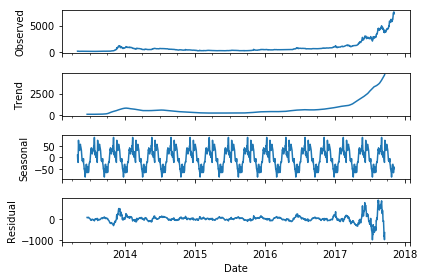

In [142]:
result_high = seasonal_decompose(btc_price_high['High'], freq=100)
result_high.plot();

# Viewing seasonal decomposition for Low Price

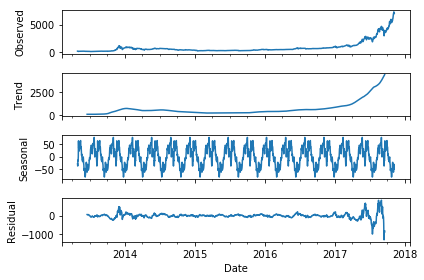

In [143]:
result_low = seasonal_decompose(btc_price_low, freq=100)
result_low.plot();

## Checking for Seasonality using Augmented Dicky-Fuller Test

In [144]:
# importing necessary test
from statsmodels.tsa.stattools import adfuller

# Creating function to pring out results of Dicky-Fuller test
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Stat', 'p-value', '# of lags', 'num of observations used']
    
    for value, label in zip(result,labels):
        print(label + ' : ' +str(value))
    
    if result[1] <= 0.05:
        print('strong evidence against null hypothesis')
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('weak eveidence against null hypothesis')
        print('fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')


Augmented Dicky-Fuller Test
ADF Test Stat : 3.84970431989
p-value : 1.0
# of lags : 24
num of observations used : 1630
weak eveidence against null hypothesis
fail to reject null hypothesis
Data has a unit root, it is non-stationary


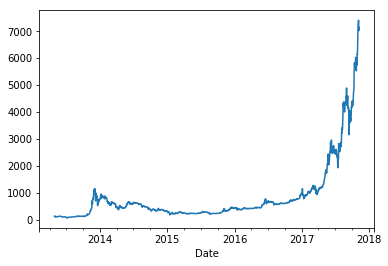

In [145]:
adf_check(btc_price_close['Close'])
btc_price_close['Close'].plot()
# data is non-stationary so need to difference it 

Augmented Dicky-Fuller Test
ADF Test Stat : -4.79094289773
p-value : 5.65976711222e-05
# of lags : 23
num of observations used : 1630
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


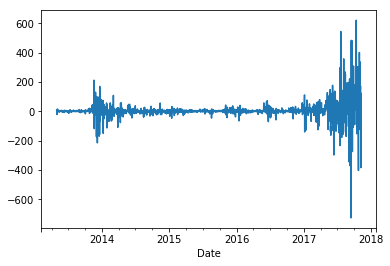

In [146]:
btc_price_close['First Diff'] = btc_price_close['Close'].diff(1)
# create a difference of one period

# Checking if time series is stationary through Dickey-Fuller Test and dropping null values
adf_check(btc_price_close['First Diff'].dropna())

# data is stationary now, checking to see plot
btc_price_close['First Diff'].plot()

In [147]:
# dong a second difference to see if seasonality changes
btc_price_close['Second Diff'] = btc_price_close['First Diff'] - btc_price_close['First Diff'].shift(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [148]:
btc_price_close.head()

,Close,trend,First Diff,Second Diff
Date,,,,
2013-04-28,134.21,122.933435,NaN,NaN
2013-04-29,144.54,122.047848,10.33,NaN
2013-04-30,139.00,121.169309,-5.54,-15.87
2013-05-01,116.99,120.318924,-22.01,-16.47
2013-05-02,105.21,119.528942,-11.78,10.23


Augmented Dicky-Fuller Test
ADF Test Stat : -14.390359477
p-value : 8.84579339246e-27
# of lags : 25
num of observations used : 1627
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


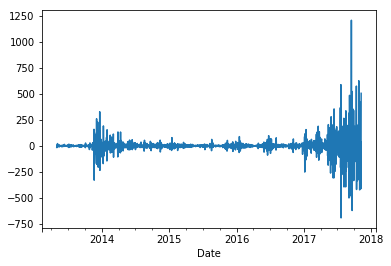

In [149]:
# Checking if time series is stationary through Dickey-Fuller Test and dropping null values
adf_check(btc_price_close['Second Diff'].dropna())

# data is stationary now, checking to see plot
btc_price_close['Second Diff'].plot()

In [150]:
btc_price_close['Seasonal Diff'] = btc_price_close['Close'].diff(30)

btc_price_close.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Close,trend,First Diff,Second Diff,Seasonal Diff
Date,,,,,
2013-04-28,134.21,122.933435,NaN,NaN,NaN
2013-04-29,144.54,122.047848,10.33,NaN,NaN
2013-04-30,139.00,121.169309,-5.54,-15.87,NaN
2013-05-01,116.99,120.318924,-22.01,-16.47,NaN
2013-05-02,105.21,119.528942,-11.78,10.23,NaN


Augmented Dicky-Fuller Test
ADF Test Stat : -7.72441815257
p-value : 1.16930823554e-11
# of lags : 25
num of observations used : 1599
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


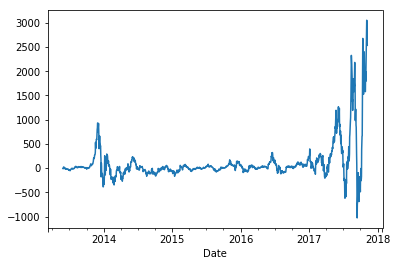

In [151]:
# Checking if time series is stationary through Dickey-Fuller Test and dropping null values
adf_check(btc_price_close['Seasonal Diff'].dropna())

# data is stationary now, checking to see plot
btc_price_close['Seasonal Diff'].plot()

## Plotting the Partial and Autocorrelation plots

In [152]:
# importing the libraries needed
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [153]:
btc_price_close.head()

,Close,trend,First Diff,Second Diff,Seasonal Diff
Date,,,,,
2013-04-28,134.21,122.933435,NaN,NaN,NaN
2013-04-29,144.54,122.047848,10.33,NaN,NaN
2013-04-30,139.00,121.169309,-5.54,-15.87,NaN
2013-05-01,116.99,120.318924,-22.01,-16.47,NaN
2013-05-02,105.21,119.528942,-11.78,10.23,NaN


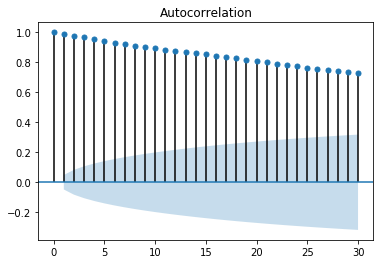

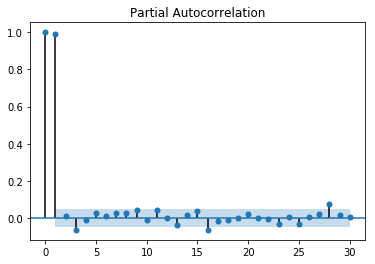

In [154]:
# Plotting for Close price
plot_acf(btc_price_close['Close'].dropna(), lags=30);
plot_pacf(btc_price_close['Close'].dropna(), lags=30);

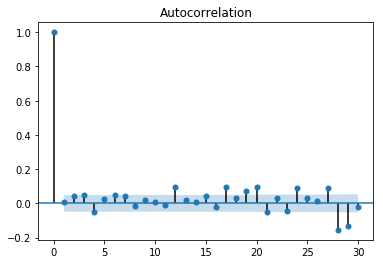

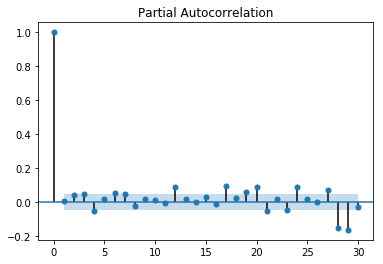

In [155]:
# Plotting for First Difference
plot_acf(btc_price_close['First Diff'].dropna(), lags=30);
plot_pacf(btc_price_close['First Diff'].dropna(), lags=30);

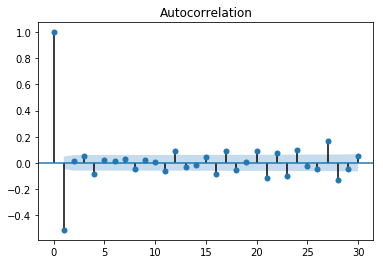

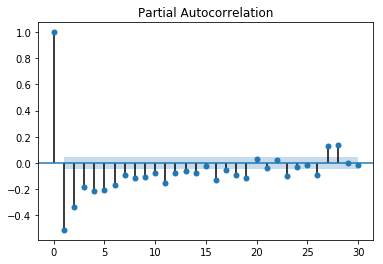

In [156]:
# Plotting for Second Difference
plot_acf(btc_price_close['Second Diff'].dropna(), lags=30);
plot_pacf(btc_price_close['Second Diff'].dropna(), lags=30);

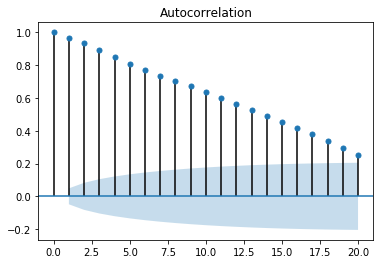

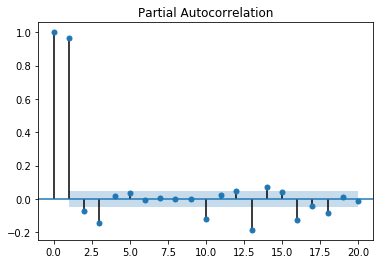

In [157]:
# Plotting for Seasonal Difference
plot_acf(btc_price_close['Seasonal Diff'].dropna(), lags=20);
plot_pacf(btc_price_close['Seasonal Diff'].dropna(), lags=20);
# since there is a sharp drop off after the first lag so we will be using an Autoregressive K number model. 
# If there was a gradual decline with our partial autocorrelation plot then we would use a moving average model.

In [158]:
# btc_close_diff = np.log10(btc_price_close['Close'])
# btc_close_diff.dropna(inplace=True)

# btc_close_diff = btc_close_diff.diff(periods=1)
# btc_close_diff.dropna(inplace=True)

# adf_check(btc_close_diff.dropna())

# btc_close_diff.plot(figsize=(12,6))

# plot_acf(btc_close_diff,lags=20);
# plot_pacf(btc_close_diff, lags=20);

## Modeling - Trying out an AR (Autoregressive) model
## In-sample predictions

In [159]:
from statsmodels.tsa.arima_model import ARMA

btc_price_close.head()

ar1 = ARMA(btc_price_close['First Diff'].dropna(), (2,1,1),dates=btc_price_close.index).fit()
# (Dummy code) ar2 = ARMA(btc_price_close['Seasonal Diff'].dropna(), (1,0),dates=btc_price_close.index).fit()
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             First Diff   No. Observations:                 1654
Model:                     ARMA(2, 1)   Log Likelihood               -9150.631
Method:                       css-mle   S.D. of innovations             61.139
Date:                Mon, 18 Dec 2017   AIC                          18311.262
Time:                        16:34:49   BIC                          18338.316
Sample:                    04-28-2013   HQIC                         18321.291
                         - 11-07-2017                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.1695     11.545      0.967      0.333     -11.458      33.797
ar.L1.First Diff     0.9836      0.025     39.544      0.000       0.935       1.032
ar.L2.First Diff     0.0151      0.025      0.608      0.543      -0.033       0.064
ma.L1.First Diff    -0.9878      0.005   -215.282      0.000      -0.997      -0.979
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           +0.0000j            1.0013            0.0000
AR.2          -66.2271           +0.0000j           66.2271            0.5000
MA.1            1.0124           +0.0000j            1.0124            0.0000
-----------------------------------------------------------------------------
"""

In [160]:
print(btc_price_close.index.shape)
print(btc_price_close['Close'].shape)
# print(ar2.fittedvalues.shape)
print(btc_price_close['Seasonal Diff'].shape)

(1655,)
(1655,)
(1655,)


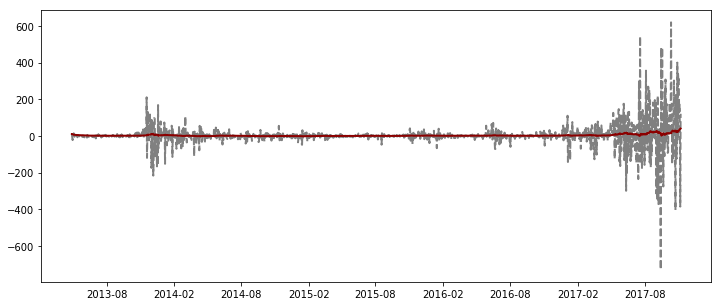

In [161]:
# date_ticks = btc_price_close.index.to_timestamp()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(btc_price_close.index[1:], btc_price_close['First Diff'].dropna(), lw=2, color='grey', ls='dashed')
ax.plot(btc_price_close.index[1:], ar1.fittedvalues, lw=2, color='darkred')
plt.show()

In [162]:
from sklearn.metrics import r2_score

r2_score(btc_price_close['First Diff'].dropna(), ar1.fittedvalues)
# really bad

0.012568183476438954

## Out-of-sample Predictions

In [163]:
from statsmodels.tsa.arima_model import _arma_predict_out_of_sample

params= ar1.params
residuals= ar1.resid
p = ar1.k_ar
q = ar1.k_ma
k_exog = ar1.k_exog
k_trend = ar1.k_trend
steps = 365

oos_predictions = _arma_predict_out_of_sample(params, steps, residuals, p, q, k_trend, 
                                              k_exog, endog=btc_price_close['First Diff'].dropna(), exog=None, start=100)

In [164]:
oos_predictions.shape

(365,)

In [165]:
btc_price_close.index.shape

(1655,)

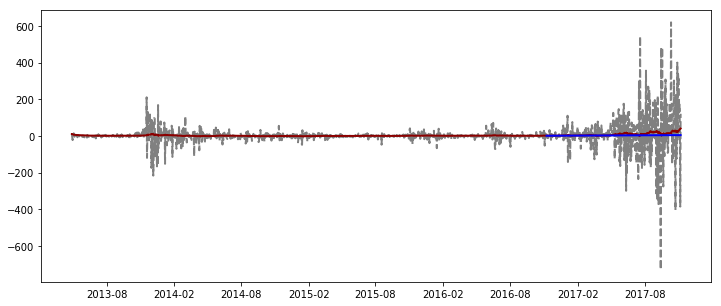

In [166]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(btc_price_close.index[1:], btc_price_close['First Diff'].dropna(), lw=2, color='grey', ls='dashed')
ax.plot(btc_price_close.index[1:], ar1.fittedvalues, lw=2, color='darkred')
ax.plot(btc_price_close.index[1290:], oos_predictions, lw=2, color='blue')
plt.show()
# 129 on line 4

## Trying out a MA (Moving Average) model

In [167]:
ma1 = ARMA(btc_price_close['First Diff'].dropna(), (1,0,2)).fit()

In [168]:
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             First Diff   No. Observations:                 1654
Model:                     ARMA(1, 0)   Log Likelihood               -9160.513
Method:                       css-mle   S.D. of innovations             61.526
Date:                Mon, 18 Dec 2017   AIC                          18327.026
Time:                        16:34:52   BIC                          18343.259
Sample:                    04-29-2013   HQIC                         18333.044
                         - 11-07-2017                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.2394      1.525      2.780      0.005       1.251       7.228
ar.L1.First Diff     0.0079      0.025      0.322      0.747      -0.040       0.056
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          126.1368           +0.0000j          126.1368            0.0000
-----------------------------------------------------------------------------
"""

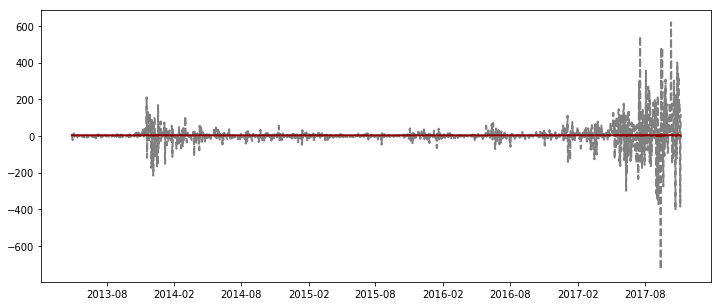

In [169]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(btc_price_close.index[1:], btc_price_close['First Diff'].dropna(), lw=2, color='grey', ls='dashed')
ax.plot(btc_price_close.index[1:], ma1.fittedvalues, lw=2, color='darkred')
plt.show()

In [170]:
r2_score(btc_price_close['First Diff'].dropna(), ma1.fittedvalues)

6.2787978905021191e-05

## ARIMA modeling

In [171]:
# modeling with ARIMA model
arima = ARIMA(btc_price_close['First Diff'].dropna(), order=(2,1,1), dates=btc_price_close.index).fit()

In [172]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.First Diff   No. Observations:                 1653
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -9145.517
Method:                       css-mle   S.D. of innovations             61.103
Date:                Mon, 18 Dec 2017   AIC                          18301.035
Time:                        16:34:56   BIC                          18328.086
Sample:                    04-29-2013   HQIC                         18311.063
                         - 11-07-2017                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0232      0.017      1.371      0.171      -0.010       0.056
ar.L1.D.First Diff    -0.0150      0.025     -0.602      0.547      -0.064       0.034
ar.L2.D.First Diff     0.0198      0.025      0.781      0.435      -0.030       0.069
ma.L1.D.First Diff    -0.9898      0.004   -256.974      0.000      -0.997      -0.982
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -6.7457           +0.0000j            6.7457            0.5000
AR.2            7.5034           +0.0000j            7.5034            0.0000
MA.1            1.0104           +0.0000j            1.0104            0.0000
-----------------------------------------------------------------------------
"""

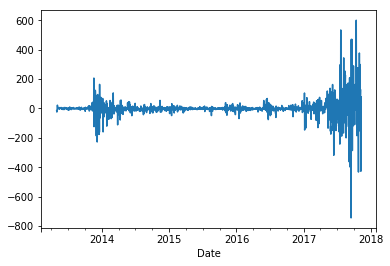

In [173]:
arima.resid.plot()

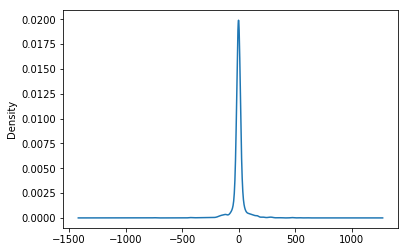

In [174]:
arima.resid.plot(kind='kde')

In [175]:
btc_price_close.shape

(1655, 5)

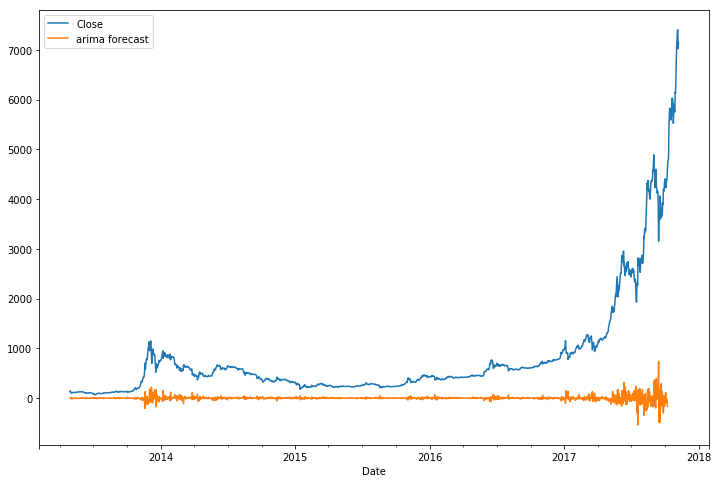

In [176]:
btc_price_close['arima forecast'] = arima.predict(start=1, end=1624)
btc_price_close[['Close', 'arima forecast']].plot(figsize=(12,8))
# started at 1, testing at 1495 to acccomodate for recent volatility
# now testing at 1344 for beginning of January 2017

In [177]:
btc_price_close['First Diff'].dropna().shape

(1654,)

In [178]:
r2_score(btc_price_close['First Diff'].dropna()[1:], arima.fittedvalues)

-0.99250592351299249

## Modeling with SARIMAX model

In [233]:
# Modeling with Seasonal ARIMA model (SARIMAX)
smodel = SARIMAX(btc_price_close['Seasonal Diff'], order=(4,1,1), seasonal_order=(2,1,1,30)).fit()
smodel.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


KeyboardInterrupt: 

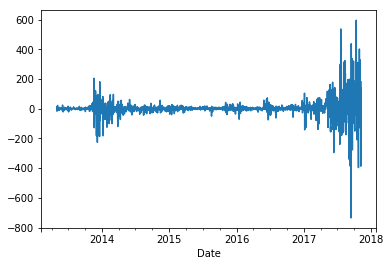

In [217]:
smodel.resid.plot()

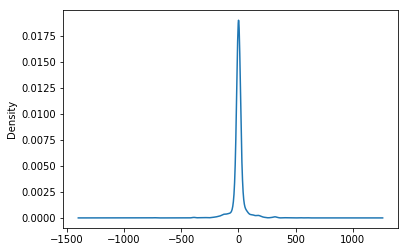

In [218]:
smodel.resid.plot(kind='kde')


In [219]:
btc_price_close.index.get_loc('2017-01-01')

1344

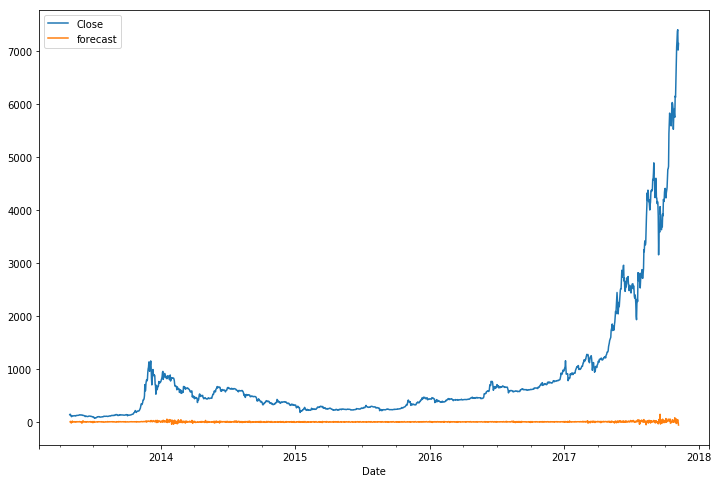

In [220]:
btc_price_close['forecast'] = smodel.predict(start=1, end=1655)
btc_price_close[['Close', 'forecast']].plot(figsize=(12,8))
# started at 1, testing at 1495 to acccomodate for recent volatility
# now testing at 1344 for beginning of January 2017

In [221]:
btc_price_close.tail()

,Close,trend,First Diff,Second Diff,Seasonal Diff,arima forecast,forecast
Date,,,,,,,
2017-11-03,7207.76,6867.349535,129.26,-181.93,2978.40,NaN,-17.730413
2017-11-04,7379.95,6965.605549,172.19,42.93,3051.54,NaN,30.366818
2017-11-05,7407.41,7063.687406,27.46,-144.73,3036.60,NaN,42.108293
2017-11-06,7022.76,7161.538853,-384.65,-412.11,2595.87,NaN,1.783682
2017-11-07,7144.38,7259.318464,121.62,506.27,2533.90,NaN,-59.824491


In [222]:
from pandas.tseries.offsets import DateOffset
future_dates = [btc_price_close.index[-1] + DateOffset(days=x) for x in range(1,360)]

In [223]:
future_btc = pd.DataFrame(columns=btc_price_close.columns, index=future_dates)

In [224]:
print(future_btc.shape)
print(btc_price_close.shape)

(359, 7)
(1655, 7)


In [225]:
final_btc = pd.concat([btc_price_close, future_btc])

In [226]:
final_btc.shape

(2014, 7)

In [227]:
final_btc['forecast'] = smodel.predict(start=1655, end=2015,dynamic=True)
# start was 1655


In [228]:
final_btc.tail()

,Close,trend,First Diff,Second Diff,Seasonal Diff,arima forecast,forecast
2018-10-28,NaN,NaN,NaN,NaN,NaN,NaN,22.582587
2018-10-29,NaN,NaN,NaN,NaN,NaN,NaN,19.894962
2018-10-30,NaN,NaN,NaN,NaN,NaN,NaN,24.052395
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,26.605541
2018-11-01,NaN,NaN,NaN,NaN,NaN,NaN,9.897645


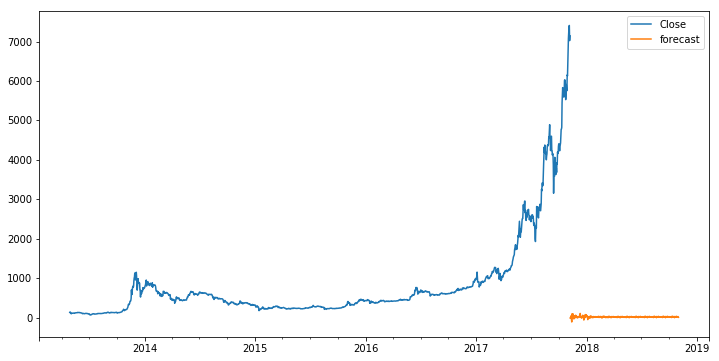

In [229]:
final_btc[['Close', 'forecast']].plot(figsize=(12,6))

In [230]:
print(smodel.fittedvalues.shape)
print(btc_price_close['Seasonal Diff'].dropna().shape)

(1655,)
(1625,)


In [231]:
r2_score(btc_price_close['Seasonal Diff'].dropna(), smodel.fittedvalues[30:])

-0.063851011147569414

In [195]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [196]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

In [197]:
final_btc.head()

,Close,trend,First Diff,Second Diff,Seasonal Diff,arima forecast,forecast
2013-04-28,134.21,122.933435,NaN,NaN,NaN,NaN,NaN
2013-04-29,144.54,122.047848,10.33,NaN,NaN,0.023200,NaN
2013-04-30,139.00,121.169309,-5.54,-15.87,NaN,8.245339,NaN
2013-05-01,116.99,120.318924,-22.01,-16.47,NaN,16.564767,NaN
2013-05-02,105.21,119.528942,-11.78,10.23,NaN,4.314326,NaN


In [198]:
# evaluate_models(final_btc['First Diff'].dropna().values, p_values, d_values, q_values)
# Grid search took too long to search over variables, need to review function and see what's causing the issue in later iterations